The parameters of hypothesis function(regression line) for minimum value of MSE  are (4.00000000000007, -29.821649537151398, 199.9999999999998, 1999.7205395702242) respectively.
w0 = 4.00000000000007
w1 = -29.821649537151398
w2 = 199.9999999999998
w3 = 1999.7205395702242
The minimum value of cost function for training dataset thus obtained is 0.000933099093652922 
The MSE(mean squarederror) of the model for train dataset is 0.001866198187305844
The minimum value of cost function for testing datset thus obtained is 1.303981935364953 
The MSE(mean squarederror) of the model for test dataset is 2.607963870729906
The R2_squared error(accuracy) for test dataset is 0.9999959327573158
The R2_squared error(accuracy) for train dataset is 0.9999999967157034


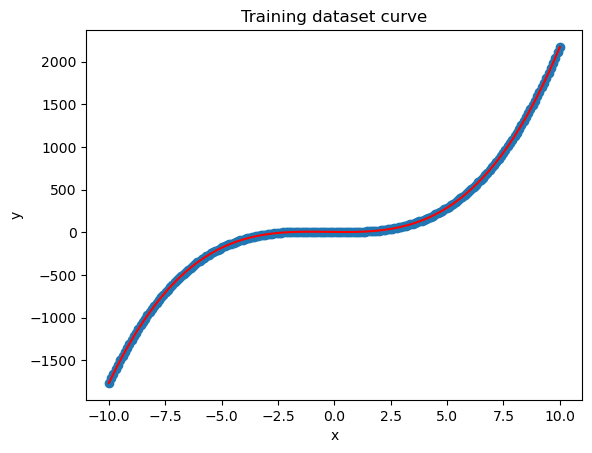

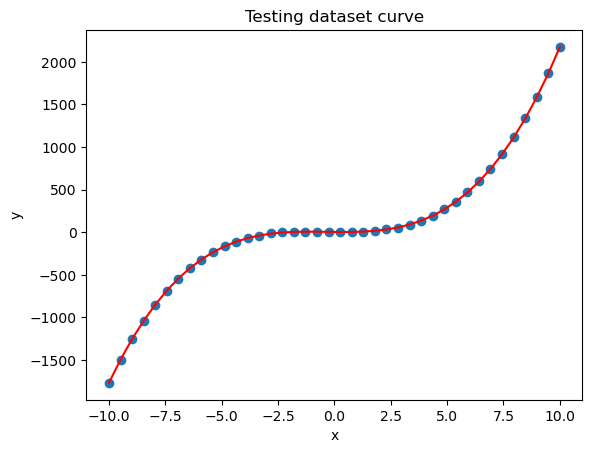

In [16]:
#LAB 10 Part2
#(a)
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
# from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn import datasets

df1=pd.read_csv('Train_dataset.csv')
input_train = np.array(df1.loc[:, 'x'])
output_train= np.array(df1.loc[:,'y'])
df2=pd.read_csv('Test_dataset.csv')
input_test = np.array(df2.loc[:, 'x'])
output_test = np.array(df2.loc[:,'y'])

def J(*args):
    lst = np.array(args)
    h = lst[0]
    for i in range(1,4):#Hypothesis function
        #print(input_train[i])
            a = np.power(input_train,i)/max(np.power(input_train,i))
            h = h+lst[i]*a
    out = np.array(output_train)
    m = len(input_train)  
    sum1 = 0
    for i in range(m):
        sum1 = sum1+(h[i]-out[i])**2
    J = sum1/(2*m)
    return J

def J_test(*args):
    lst = np.array(args)
    h = lst[0]
    for i in range(1,4):#Hypothesis function
        #print(input_train[i])
            a = np.power(input_test,i)/max(np.power(input_test,i))
            h = h+lst[i]*a        
    out = np.array(output_test)
    m = len(input_test)  
    sum3 = 0
    for i in range(m):
        sum3 = sum3+(h[i]-out[i])**2
    
    J_1 = sum3/(2*m)
    return J_1
def R_squared(*args):
    lst = np.array(args)
    h = lst[0]
    for i in range(1,4):#Hypothesis function
            a = np.power(input_test,i)/max(np.power(input_test,i))
            h = h+lst[i]*a        
    out = np.array(output_test)
    R1 = r2_score(out,h)
    h2 = lst[0]
    for i in range(1,4):#Hypothesis function
        #print(input_train[i])
            a = np.power(input_train,i)/max(np.power(input_train,i))
            h2 = h2+lst[i]*a
    out2 = np.array(output_train)
    R2 =  r2_score(out2,h2)
    return R1,R2    

def gradJ(*args):
    lst = args[0]
    
    h = lst[0]
    for i in range(1,4):#Hypothesis function
        #print(input_train[i])
            a = np.power(input_train,i)/max(np.power(input_train,i))
            h = h+lst[i]*a
    out = np.array(output_train)
    m = len(input_train)
    grad = []
    sum0 = 0
    for i in range(m):
        sum0 = sum0 + (h[i] - out[i])
    J1 = sum0/m
    grad.append(J1)
    for i in range(1,4):
        sum2 = 0
        a = np.power(input_train,i)/max(np.power(input_train,i))
        for j in range(m):
            sum2 = sum2+(h[j] - out[j])*a[j]
        J2 = sum2/m
        grad.append(J2)
        
    grad_J = np.array(grad)
    return grad_J
class unidirection_search():#line search
    def __init__(self,w_s,s):
        self.w_s = w_s
        self.s = s
    def u_s(self,a):
        deg = 3
        self.array = []
        for i in range(deg+1):
            self.array.append(self.w_s[i]  + a*self.s[i])
        j1 = J(*self.array)
        return j1
    def critical(self,a,b,n):
        self.delta  = (b-a)/n
        self.a1 = a
        self.a2 = self.a1+self.delta
        self.a3 = self.a2+self.delta
        while self.a3<=b:
            if self.u_s(self.a1)>=self.u_s(self.a2)<=self.u_s(self.a3):
                self.tup1 = (self.a1,self.a3)
                return self.tup1
            else:
                self.a1 = self.a2
                self.a2 = self.a3
                self.a3 = self.a3 + self.delta
        self.tup = 0 
        self.tup1 = b
   
    def interval_halving(self,a,b):
        self.E = 0.000001
        self.a = a
        self.b = b
        self.L = self.b-self.a
        self.a_m = (self.a+self.b)/2
        while abs(self.L)>=self.E:
            self.Ja = self.u_s(self.a_m)
            self.a1 = self.a+self.L/4
            self.a2 = self.b-self.L/4
            self.Ja1 = self.u_s(self.a1)
            self.Ja2 = self.u_s(self.a2)
            if self.Ja1 < self.Ja:
                self.b = self.a_m
                self.a_m = self.a1
            elif self.Ja2 < self.Ja:
                self.a = self.a_m
                self.a_m = self.a2
            else:
                self.b = self.a2
                self.a = self.a1
                self.a_m = (self.a+self.b)/2
            self.L = self.b-self.a
        self.tup_3 = (self.a,self.b)
        return (self.tup_3[0]+self.tup_3[1])/2
class steepest_gradient():#steepest gradient descent
    def __init__(self,w_s,E1,E2):#w_s is the starting point and s is the direction vector (in this case it will be -grad(J))
        self.w_s = w_s
        self.E1 = E1
        self.E2 = E2
    def grad_des(self,a,b):#gradient descent procedure
#         c = unidirection_search(self.w_s,-1*gradJ(self.w_s))#Finding correct alpha using linear search
#         self.a = c.interval_halving(a,b)
# uncomment the above two lines to use variable alpha using line search and comment the fixed alpha
        self.a = 0.5
        deg = 3
        self.array = []
        for i in range(deg+1):
            self.array.append(self.w_s[i]  + self.a*(-gradJ(self.w_s)[i]))
        self.grad_1 = gradJ(self.array)
        self.J1 = J(*self.array)
        self.k = 0
        while np.linalg.norm(self.grad_1) > self.E1 and self.k<=1000 :#stopping criteria
#             c = unidirection_search(self.array,-1*self.grad_1)
#             self.a = c.interval_halving(a,b)
# uncomment the above two lines to use variable alpha using line search and comment the fixed alpha
            self.array1 = []
            for i in range(deg+1):
                    self.array1.append(self.array[i]  + self.a*(-gradJ(self.array)[i]))
            
            if abs(np.dot(gradJ(self.array),gradJ(self.array1))) < self.E2:#stopping criteria2
                  break
            self.array = self.array1
            self.grad_1 = gradJ(self.array)
            self.k += 1
        return self.array
     
    def minimum(self):
        min_1 = J(*self.array)
        min_J = J_test(*self.array) 
        R1,R2 = R_squared(*self.array)
        return min_J,min_1,R1,R2

w_s = [0.1,0.1,1,1]
a = 0
b = 1 #put b>=1 to get the perfect value of 0 as minimum
E1 = 0.0000001
E2 = 0.0000001
# n = 100
c1 = steepest_gradient(w_s,E1,E2)
w = tuple(c1.grad_des(a,b))
print(f"The parameters of hypothesis function(regression line) for minimum value of MSE  are {w} respectively.")
print(f'w0 = {w[0]}')
print(f'w1 = {w[1]}')
print(f'w2 = {w[2]}')
print(f'w3 = {w[3]}')
J_min1,J_min2,R1,R2= c1.minimum()
print(f"The minimum value of cost function for training dataset thus obtained is {J_min2} ")
print(f"The MSE(mean squarederror) of the model for train dataset is {2*J_min2}")
print(f"The minimum value of cost function for testing datset thus obtained is {J_min1} ")
print(f"The MSE(mean squarederror) of the model for test dataset is {2*J_min1}")
print(f"The R2_squared error(accuracy) for test dataset is {R1}")
print(f"The R2_squared error(accuracy) for train dataset is {R2}")


h = w[0]
for i in range(1,4):#Hypothesis function
    #print(input_train[i])
        a = np.power(input_train,i)/max(np.power(input_train,i))
        h = h+w[i]*a
pl.scatter(input_train,output_train)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Training dataset curve")
pl.plot(input_train,h,c='red')
pl.show()

h = w[0]
for i in range(1,4):#Hypothesis function
    #print(input_train[i])
        a = np.power(input_test,i)/max(np.power(input_test,i))
        h = h+w[i]*a
pl.scatter(input_test,output_test)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Testing dataset curve")
pl.plot(input_test,h,c='red')
pl.show()


The parameters of hypothesis function(regression line) for minimum value of MSE  are (6.156435137319537, 101.86756584261853, 193.59506578617035, 1780.9057777380983) respectively.
The minimum value of cost function for training dataset thus obtained is 2981.7585512157075 
The MSE(mean squared error) of the model for train dataset is 5963.517102431415
The minimum value of cost function for testing datset thus obtained is 12732.211559211315 
The MSE(mean squared error) of the model for test dataset is 25464.42311842263
The R2_squared error(accuracy) for test dataset is 0.9979440297453975
The R2_squared error(accuracy) for train dataset is 0.9980037698927061
w0 = 6.156435137319537
w1 = 101.86756584261853
w2 = 193.59506578617035
w3 = 1780.9057777380983


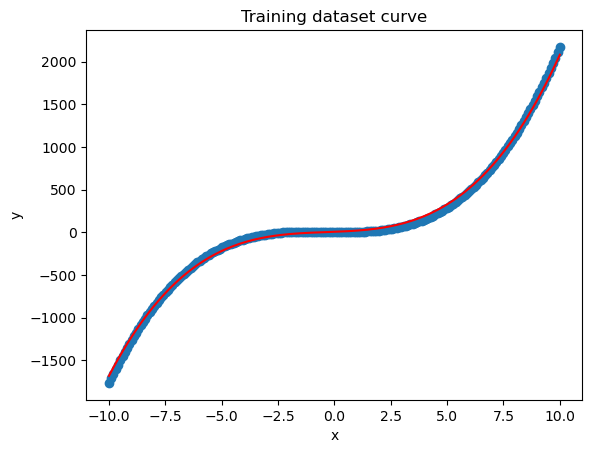

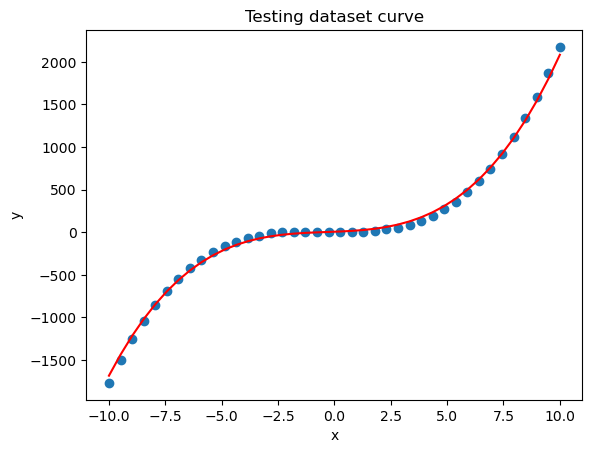

In [58]:
#(b)
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn import datasets
lamda = 0.3
df1=pd.read_csv('Train_dataset.csv')
input_train = np.array(df1.loc[:, 'x'])
output_train= np.array(df1.loc[:,'y'])
df2=pd.read_csv('Test_dataset.csv')
input_test = np.array(df2.loc[:, 'x'])
output_test = np.array(df2.loc[:,'y'])

def J(*args):
    lst = np.array(args)
    lst1 = list(args)
    lst1.pop(0)
    lst_2 = np.power(lst1,2)
    h = lst[0]
    for i in range(1,4):#Hypothesis function
        #print(input_train[i])
            a = np.power(input_train,i)/max(np.power(input_train,i))
            h = h+lst[i]*a
    out = np.array(output_train)
    m = len(input_train)  
    sum1 = 0
    for i in range(m):
        sum1 = sum1+(h[i]-out[i])**2
    J = (sum1+lamda*sum(lst_2))/(2*m)
    return J

def R_squared(*args):
    lst = np.array(args)
    h = lst[0]
    for i in range(1,4):#Hypothesis function
            a = np.power(input_test,i)/max(np.power(input_test,i))
            h = h+lst[i]*a        
    out = np.array(output_test)
    R1 = r2_score(out,h)
    h2 = lst[0]
    for i in range(1,4):#Hypothesis function
        #print(input_train[i])
            a = np.power(input_train,i)/max(np.power(input_train,i))
            h2 = h2+lst[i]*a
    out2 = np.array(output_train)
    R2 =  r2_score(out2,h2)
    return R1,R2  

def J_test(*args):
    lst = np.array(args)
    lst1 = list(args)
    lst1.pop(0)
    lst_2 = np.power(lst1,2)
    h = lst[0]
    for i in range(1,4):#Hypothesis function
        #print(input_train[i])
            a = np.power(input_test,i)/max(np.power(input_test,i))
            h = h+lst[i]*a        
    out = np.array(output_test)
    m = len(input_test)  
    sum3 = 0
    for i in range(m):
        sum3 = sum3+(h[i]-out[i])**2
    
    J_1 = (sum3+lamda*sum(lst_2))/(2*m)
    return J_1
    

def gradJ(*args):
    lst = args[0]
    h = lst[0]
    for i in range(1,4):#Hypothesis function
        #print(input_train[i])
            a = np.power(input_train,i)/max(np.power(input_train,i))
            h = h+lst[i]*a
    out = np.array(output_train)
    m = len(input_train)
    grad = []
    sum0 = 0
    for i in range(m):
        sum0 = sum0 + (h[i] - out[i])
    J1 = (sum0)/m
    grad.append(J1)
    for i in range(1,4):
        sum2 = 0
        a = np.power(input_train,i)/max(np.power(input_train,i))
        for j in range(m):
            sum2 = sum2+(h[j] - out[j])*a[j]
        J2 = (sum2+lamda*lst[i])/m
        grad.append(J2)
        
    grad_J = np.array(grad)
    return grad_J
class unidirection_search():#line search
    def __init__(self,w_s,s):
        self.w_s = w_s
        self.s = s
    def u_s(self,a):
        deg = 3
        self.array = []
        for i in range(deg+1):
            self.array.append(self.w_s[i]  + a*self.s[i])
        j1 = J(*self.array)
        return j1
    def critical(self,a,b,n):
        self.delta  = (b-a)/n
        self.a1 = a
        self.a2 = self.a1+self.delta
        self.a3 = self.a2+self.delta
        while self.a3<=b:
            if self.u_s(self.a1)>=self.u_s(self.a2)<=self.u_s(self.a3):
                self.tup1 = (self.a1,self.a3)
                return self.tup1
            else:
                self.a1 = self.a2
                self.a2 = self.a3
                self.a3 = self.a3 + self.delta
        self.tup = 0 
        self.tup1 = b
   
    def interval_halving(self,a,b):
        self.E = 0.000001
        self.a = a
        self.b = b
        self.L = self.b-self.a
        self.a_m = (self.a+self.b)/2
        while abs(self.L)>=self.E:
            self.Ja = self.u_s(self.a_m)
            self.a1 = self.a+self.L/4
            self.a2 = self.b-self.L/4
            self.Ja1 = self.u_s(self.a1)
            self.Ja2 = self.u_s(self.a2)
            if self.Ja1 < self.Ja:
                self.b = self.a_m
                self.a_m = self.a1
            elif self.Ja2 < self.Ja:
                self.a = self.a_m
                self.a_m = self.a2
            else:
                self.b = self.a2
                self.a = self.a1
                self.a_m = (self.a+self.b)/2
            self.L = self.b-self.a
        self.tup_3 = (self.a,self.b)
        return (self.tup_3[0]+self.tup_3[1])/2
class steepest_gradient():#steepest gradient descent
    def __init__(self,w_s,E1,E2):#w_s is the starting point and s is the direction vector (in this case it will be -grad(J))
        self.w_s = w_s
        self.E1 = E1
        self.E2 = E2
    def grad_des(self,a,b):#gradient descent procedure
#         c = unidirection_search(self.w_s,-1*gradJ(self.w_s))#Finding correct alpha using linear search
#         self.a = c.interval_halving(a,b)
#         uncomment the above two lines to use variable alpha using line search and comment the fixed alpha
        self.a = 0.5
        deg = 3
        m = len(input_train) 
        self.array = []
        self.array.append(self.w_s[0] + self.a*(-gradJ(self.w_s)[0]))
        for i in range(1,deg+1):
            self.array.append(self.w_s[i]*(1-(self.a*lamda/m))  + self.a*(-gradJ(self.w_s)[i]))
        self.grad_1 = gradJ(self.array)
        self.J1 = J(*self.array)
        self.k = 0
        while np.linalg.norm(self.grad_1) > self.E1 and self.k<=1000 :#stopping criteria
#             c = unidirection_search(self.array,-1*self.grad_1)
#             self.a = c.interval_halving(a,b)
#             uncomment the above two lines to use variable alpha using line search and comment the fixed alpha
            self.array1 = []
            self.array1.append(self.array[0]  + self.a*(-gradJ(self.array)[0]))
            for i in range(1,deg+1):
                    self.array1.append(self.array[i]*(1-(self.a*lamda/m))  + self.a*(-gradJ(self.array)[i]))#regularistaion
            
            if abs(np.dot(gradJ(self.array),gradJ(self.array1))) < self.E2:#stopping criteria
                  break
            self.array = self.array1
            self.grad_1 = gradJ(self.array)
            self.k += 1
        return self.array
     
    def minimum(self):
        min_1 = J(*self.array)
        min_J = J_test(*self.array) 
        R1,R2 = R_squared(*self.array)
        return min_J,min_1,R1,R2

w_s = [0.1,0.1,1,1]
a = 0
b = 1 #put b>=1 to get the perfect value of 0 as minimum
E1 = 0.0000001
E2 = 0.0000001
# n = 100
c1 = steepest_gradient(w_s,E1,E2)
w = tuple(c1.grad_des(a,b))
print(f"The parameters of hypothesis function(regression line) for minimum value of MSE  are {w} respectively.") 
J_min1,J_min2,R1,R2= c1.minimum()
print(f"The minimum value of cost function for training dataset thus obtained is {J_min2} ")
print(f"The MSE(mean squared error) of the model for train dataset is {2*J_min2}")
print(f"The minimum value of cost function for testing datset thus obtained is {J_min1} ")
print(f"The MSE(mean squared error) of the model for test dataset is {2*J_min1}")
print(f"The R2_squared error(accuracy) for test dataset is {R1}")
print(f"The R2_squared error(accuracy) for train dataset is {R2}")
print(f'w0 = {w[0]}')
print(f'w1 = {w[1]}')
print(f'w2 = {w[2]}')
print(f'w3 = {w[3]}')

h = w[0]
for i in range(1,4):#Hypothesis function
    #print(input_train[i])
        a = np.power(input_train,i)/max(np.power(input_train,i))
        h = h+w[i]*a
pl.scatter(input_train,output_train)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Training dataset curve")
pl.plot(input_train,h,c='red')
pl.show()

h = w[0]
for i in range(1,4):#Hypothesis function
    #print(input_train[i])
        a = np.power(input_test,i)/max(np.power(input_test,i))
        h = h+w[i]*a
pl.scatter(input_test,output_test)
pl.xlabel('x')
pl.ylabel('y')
pl.title("Testing dataset curve")
pl.plot(input_test,h,c='red')
pl.show()
#Inference
# By decreaing value of delta closer to 0 we can decrease down test dataset error since it already fitted very well for non regularised case.